In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import os
import re
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision.transforms import Normalize
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [52]:
# # Define the CNN model
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(32 * 16 * 16, 256)
#         self.fc2 = nn.Linear(256, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = x.view(-1, 32 * 16 * 16)
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


In [53]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(64 * 8 * 8, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.pool(torch.relu(self.conv3(x)))
#         x = x.view(-1, 64 * 8 * 8)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


In [54]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(128 * 4 * 4, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 128)
#         self.fc4 = nn.Linear(128, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.pool(torch.relu(self.conv3(x)))
#         x = self.pool(torch.relu(self.conv4(x)))
#         x = x.view(-1, 128 * 4 * 4)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x

In [55]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = self.pool(torch.relu(self.conv5(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2)

    def forward(self, x):
        x = self.pool(self.leaky_relu(self.conv1(x)))
        x = self.pool(self.leaky_relu(self.conv2(x)))
        x = self.pool(self.leaky_relu(self.conv3(x)))
        x = self.pool(self.leaky_relu(self.conv4(x)))
        x = self.pool(self.leaky_relu(self.conv5(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.leaky_relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [56]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
#         self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
#         self.conv6 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(1024 * 1 * 1, 2048)
#         self.fc2 = nn.Linear(2048, 1024)
#         self.fc3 = nn.Linear(1024, 512)
#         self.fc4 = nn.Linear(512, 256)
#         self.fc5 = nn.Linear(256, 128)
#         self.fc6 = nn.Linear(128, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.pool(torch.relu(self.conv3(x)))
#         x = self.pool(torch.relu(self.conv4(x)))
#         x = self.pool(torch.relu(self.conv5(x)))
#         x = self.pool(torch.relu(self.conv6(x)))
#         x = x.view(-1, 1024 * 1 * 1)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = torch.relu(self.fc4(x))
#         x = torch.relu(self.fc5(x))
#         x = self.fc6(x)
#         return x

In [3]:
# Create training dataset
# Set up the data directories
data_dir = 'Test_Images'
train_dir = os.path.join(data_dir, 'Train')

# Define a function to get the labels from the image filenames
def get_label(filename):
    match = re.search(r'\d+\.?\d*', filename)
    if match:
        return float(match.group())
    else:
        return None

# Define a list to store the image filenames and labels
train_data = []

# Iterate over the training images and add them to the list
for filename in os.listdir(train_dir):
    label = get_label(filename)
    if label is not None:
        train_data.append([os.path.join(train_dir, filename), label])

# Convert the list to a dataframe
train_df = pd.DataFrame(train_data, columns=['filename', 'label'])

# Save the dataframe to a CSV file
train_df.to_csv(os.path.join(data_dir, 'train.csv'), index=False)

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, image_folder, transform=None):
        self.data = self._load_data(csv_file)
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_path, label = self.data[index]
        image = Image.open(image_path).convert("RGB")

        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def _load_data(self, csv_file):
    # Load and preprocess data from the CSV file
    # Example: Assuming the CSV file has two columns representing image paths and labels
        data = []
        with open(csv_file, 'r') as file:
            lines = file.readlines()
            for line in lines[1:]:  # Skip the header row
                # Split the line by comma or any other appropriate delimiter
                image_path, label = line.strip().split(',')
                data.append((image_path, float(label)))  # Parse the label as float
        return data

# # Access individual samples
# image, label = dataset[0]
# print(image.shape, label)

In [59]:
# psum    = torch.tensor([0.0, 0.0, 0.0])
# psum_sq = torch.tensor([0.0, 0.0, 0.0])

# # loop through images
# # for inputs in train_data:#DataLoader(train_data, batch_size=batch_size, shuffle=True):
# for i, (images, labels) in enumerate(train_loader):
#     psum    += images.sum(axis        = [0, 2, 3])
#     psum_sq += (images ** 2).sum(axis = [0, 2, 3])
    

# # Final Calculation
# # pixel count
# image_size = 256
# count = 870 * image_size * image_size

# # mean and std
# total_mean = psum / count
# total_var  = (psum_sq / count) - (total_mean ** 2)
# total_std  = torch.sqrt(total_var)

# # output
# print('mean: '  + str(total_mean))
# print('std:  '  + str(total_std))

In [6]:
input_image = Image.open('Test_Images\Train\drop_s40_v5_r0.5_str6_pos0_camz0_camy1.png')  # Replace 'input_image.jpg' with the path to your input image file
transform = ToTensor()
tensor = transform(input_image)
# Calculate mean and standard deviation
mean = torch.mean(tensor)
std = torch.std(tensor)

# Normalize the data
normalizer = Normalize(mean=[mean.item(), mean.item(), mean.item()], std=[std.item(), std.item(), std.item()])
# Set up the data
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean= [mean, mean, mean], std=[std, std, std])               # Need to be adjusted, acording to dataset
])


In [7]:
# Example usage:
csv_file = 'Test_Images/train.csv'  # Replace with the path to your CSV file
image_folder = 'Test_Images/train'  # Replace with the path to your image folder


# Split the dataset into training and validation sets
dataset = CustomImageDataset(csv_file, image_folder, transform=transform)
# Define the sizes for your training, validation, and test sets
train_size = int(0.6 * len(dataset))  # 60% for training
val_size = int(0.2 * len(dataset))    # 20% for validation
test_size = len(dataset) - train_size - val_size  # Remaining 20% for test

# Use random_split to split the dataset into training, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [8]:
# Define the loss function and optimizer
model = CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=1, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.2)
)

In [63]:
# num_epochs = 30
# best_val_loss = float('inf')
# patience = 5  # Number of epochs to wait for improvement
# counter = 0  # Counter to track the number of epochs without improvement

# for epoch in range(num_epochs):
#     running_loss = 0.0
    
#     # Training phase
#     model.train()
#     for i, (inputs, labels) in enumerate(train_loader, 0):
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         labels = labels.unsqueeze(1)
#         loss = criterion(outputs, labels.float())
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         if i % 100 == 99:
#             print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 100))
#             running_loss = 0.0
            
#     # Validation phase
#     model.eval()
#     with torch.no_grad():
#         val_loss = 0.0
#         val_samples = 0
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             labels = labels.unsqueeze(1)
#             loss = criterion(outputs, labels.float())
#             val_loss += loss.item() * inputs.size(0)
#             val_samples += inputs.size(0)
        
#         average_val_loss = val_loss / val_samples
#         print('Epoch %d - Validation Loss: %.6f' % (epoch + 1, average_val_loss))
        
#         # Check if validation loss improved
#         if average_val_loss < best_val_loss:
#             best_val_loss = average_val_loss
#             counter = 0
#             torch.save(model, 'trained_model')  # Save the best model
#         else:
#             counter += 1
#             if counter >= patience:
#                 print('No improvement in validation loss. Early stopping.')
#                 break
        
#     print('Epoch %d completed.' % (epoch + 1))

[1,   100] loss: 985.744176
[1,   200] loss: 281.933606
Epoch 1 - Training Loss: 36.635966 - Validation Loss: 80.856820
Epoch 1 completed.
[2,   100] loss: 246.368239
[2,   200] loss: 222.971667
Epoch 2 - Training Loss: 30.949915 - Validation Loss: 80.314508
Epoch 2 completed.
[3,   100] loss: 208.984715
[3,   200] loss: 186.922446
Epoch 3 - Training Loss: 25.379995 - Validation Loss: 92.327895
Epoch 3 completed.
[4,   100] loss: 181.185165
[4,   200] loss: 169.391364
Epoch 4 - Training Loss: 23.646308 - Validation Loss: 104.038695
Epoch 4 completed.
[5,   100] loss: 161.162641
[5,   200] loss: 156.566609
Epoch 5 - Training Loss: 20.546073 - Validation Loss: 77.096612
Epoch 5 completed.
[6,   100] loss: 140.737868
[6,   200] loss: 140.017018
Epoch 6 - Training Loss: 18.686811 - Validation Loss: 73.282372
Epoch 6 completed.
[7,   100] loss: 130.016447
[7,   200] loss: 125.769934
Epoch 7 - Training Loss: 17.973531 - Validation Loss: 69.076819
Epoch 7 completed.
[8,   100] loss: 112.21947

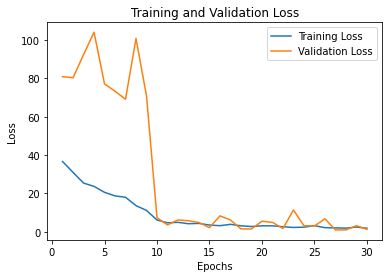

In [9]:
num_epochs = 30
best_val_loss = float('inf')
patience = 10  # Number of epochs to wait for improvement
counter = 0  # Counter to track the number of epochs without improvement

train_losses = []  # List to store training losses
val_losses = []  # List to store validation losses
epoch_numbers = [] # List to store epoch numbers

for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Training phase
    model.train()
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.unsqueeze(1)
        loss = criterion(outputs, labels.float())

        # L1 regularization
        l1_lambda = 0.01  # Adjust the L1 regularization strength
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1)
        loss += l1_lambda * l1_regularization

        # L2 regularization
        l2_lambda = 0.01  # Adjust the L2 regularization strength
        l2_regularization = torch.tensor(0.)
        for param in model.parameters():
            l2_regularization += torch.norm(param, 2)
        loss += l2_lambda * l2_regularization

        running_loss += loss.item()

        loss.backward()
        optimizer.step()

        if i % 100 == 99:
            print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
            
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_samples = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels.float())
            val_loss += loss.item() * inputs.size(0)
            val_samples += inputs.size(0)
        
        average_val_loss = val_loss / val_samples
        # Append the losses to the lists
        train_losses.append(running_loss / len(train_loader))
        val_losses.append(average_val_loss)
        epoch_numbers.append(epoch + 1)  # Add the epoch number
        # print('Epoch %d - Validation Loss: %.6f' % (epoch + 1, average_val_loss))
        # Print the running loss and validation loss at the end of the epoch
        print('Epoch %d - Training Loss: %.6f - Validation Loss: %.6f' % (epoch + 1, running_loss / len(train_loader), average_val_loss))

        
        # Check if validation loss improved
        if average_val_loss < best_val_loss:
            best_val_loss = average_val_loss
            counter = 0
            torch.save(model.state_dict(), 'trained_model')  # Save the best model
            
        else:
            counter += 1
            if counter >= patience:
                print('No improvement in validation loss. Early stopping.')
                break
        
    print('Epoch %d completed.' % (epoch + 1))

# Plotting the losses
# epochs = range(1, num_epochs + 1)
plt.plot(epoch_numbers, train_losses, label='Training Loss')
plt.plot(epoch_numbers, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
model = torch.load('trained_model')  # Replace 'trained_model.pth' with the path to your trained model file

# Load and preprocess the input image
input_image = Image.open('Test_Images\Train\drop_s40_v5_r0.5_str6_pos0_camz0_camy1.png')  # Replace 'input_image.jpg' with the path to your input image file
input_image = input_image.convert('RGB')
input_tensor = transform(input_image)

# input_tensor = torchvision.transforms.ToTensor()(input_image).unsqueeze(0)  # Preprocess the image and add a batch dimension
input_tensor.shape

torch.Size([3, 64, 64])

In [12]:
model = CNN()  # Replace YourModel with your actual model class
# Load the trained weights
model.load_state_dict(torch.load('trained_model'))

# Access the weights
weights = model.state_dict()

# Print the weights
for name, param in weights.items():
    print(f'Weights:\n{param}')

Weights:
tensor([[[[ 1.7627e-01, -5.7772e-02, -1.2223e-01],
          [-1.6794e-01,  1.3516e-01, -1.6773e-01],
          [ 7.8644e-02,  5.9927e-02,  1.2754e-02]],

         [[ 1.3686e-01, -3.2446e-02, -1.9959e-01],
          [ 1.9588e-02, -1.1265e-01, -1.3797e-01],
          [-6.2174e-02,  4.2555e-02,  6.9884e-03]],

         [[-1.7853e-01,  1.0549e-01,  4.6065e-02],
          [ 7.2836e-02,  1.1922e-01,  1.2787e-01],
          [-5.3981e-02,  1.9999e-01,  1.5942e-01]]],


        [[[-1.4391e-01, -1.5206e-01, -8.2322e-02],
          [ 8.7563e-02,  2.0105e-02,  9.6144e-02],
          [ 6.2429e-02,  2.0677e-01, -1.2933e-01]],

         [[-1.2996e-01, -1.5813e-01,  5.8514e-02],
          [-6.2022e-02,  1.3795e-01,  1.7158e-01],
          [-9.6329e-03,  1.7313e-02,  2.1549e-01]],

         [[ 1.1695e-01, -1.1468e-01, -7.3521e-02],
          [ 1.8987e-01, -1.1762e-01, -1.0263e-01],
          [ 8.7265e-02,  1.5260e-01, -2.2256e-02]]],


        [[[ 8.3077e-02,  1.7304e-01, -1.4892e-01],
      

In [13]:
# Set the model in evaluation mode
model.eval()

# Make a prediction
with torch.no_grad():
    output = model(input_tensor)

# Convert the output to a readable format
predicted_value = output.item()

# Print the predicted value
print('Predicted value:', predicted_value)

Predicted value: 40.880340576171875


In [14]:
# Set the device for computation (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Image', 'Real Value', 'Predicted Value', 'Difference'])

# Iterate over the figures in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extensions as per your figures
        image_path = os.path.join(image_folder, filename)
        
        # Load and preprocess the image
        image = Image.open(image_path).convert('RGB')
        input_tensor = transform(image).unsqueeze(0).to(device)
        
        # Extract the real value from the filename
        real_value = int(filename.split('_')[1][1:])  # Adjust the splitting pattern to extract the desired value
        
        # Make the prediction
        with torch.no_grad():
            output = model(input_tensor)
        predicted_value = output.item()
        
        # Calculate the difference between predicted and real value
        difference = predicted_value - real_value

        # Add the prediction, real value, and difference to the DataFrame
        predictions_df = predictions_df.append({'Image': filename, 'Real Value': real_value, 'Predicted Value': predicted_value, 'Difference': difference}, ignore_index=True)

# Print the predictions table
print(predictions_df)

                                             Image Real Value  \
0       drop_s40_v5_r0.5_str6_pos0_camz0_camy0.png         40   
1       drop_s40_v5_r0.5_str6_pos0_camz0_camy1.png         40   
2      drop_s40_v5_r0.5_str6_pos0_camz0_camy10.png         40   
3      drop_s40_v5_r0.5_str6_pos0_camz0_camy11.png         40   
4      drop_s40_v5_r0.5_str6_pos0_camz0_camy12.png         40   
...                                            ...        ...   
12395   drop_s70_v5_r0.5_str6_pos0_camz9_camy5.png         70   
12396   drop_s70_v5_r0.5_str6_pos0_camz9_camy6.png         70   
12397   drop_s70_v5_r0.5_str6_pos0_camz9_camy7.png         70   
12398   drop_s70_v5_r0.5_str6_pos0_camz9_camy8.png         70   
12399   drop_s70_v5_r0.5_str6_pos0_camz9_camy9.png         70   

       Predicted Value  Difference  
0            41.463924    1.463924  
1            40.880341    0.880341  
2            39.583050   -0.416950  
3            39.115772   -0.884228  
4            40.884521    0.884521

Mean Squared Error (MSE): 0.8940193220135682


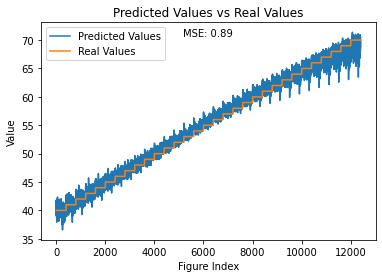

In [15]:
# Extract the real and predicted values from the DataFrame
real_values = predictions_df['Real Value']
predicted_values = predictions_df['Predicted Value']

# Calculate the mean squared error (MSE)
differences = predictions_df['Difference']
mse = np.mean(differences ** 2)

# Print MSE
print('Mean Squared Error (MSE):', mse)

# Plot the predicted values and the real values
plt.plot(predicted_values, label='Predicted Values')
plt.plot(real_values, label='Real Values')
plt.xlabel('Figure Index')
plt.ylabel('Value')
plt.title('Predicted Values vs Real Values')
plt.legend()

# Display the MSE in the plot
plt.text(0.5, 0.95, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

MSE per Real Value:
Real Value
40    1.110454
41    0.767498
42    0.596136
43    0.516511
44    0.492300
45    0.481275
46    0.487150
47    0.509317
48    0.541837
49    0.571955
50    0.606000
51    0.651514
52    0.700036
53    0.755175
54    0.783808
55    0.814473
56    0.833647
57    0.833399
58    0.806601
59    0.771374
60    0.710844
61    0.654035
62    0.605452
63    0.595126
64    0.623593
65    0.721015
66    0.932279
67    1.300067
68    1.833047
69    2.566862
70    3.541820
Name: Difference, dtype: float64


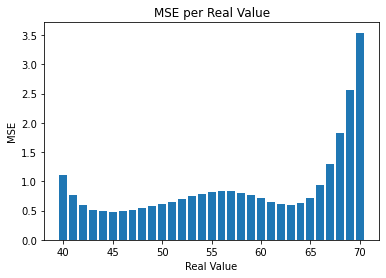

In [16]:
# Calculate the MSE per real value
mse_per_real_value = predictions_df.groupby('Real Value')['Difference'].apply(lambda x: mean_squared_error(x, np.zeros_like(x)))

# Print the MSE per real value
print('MSE per Real Value:')
print(mse_per_real_value)

# Plot the MSE per real value
plt.bar(mse_per_real_value.index, mse_per_real_value)
plt.xlabel('Real Value')
plt.ylabel('MSE')
plt.title('MSE per Real Value')

# Show the plot
plt.show()

In [17]:
# Set the device for computation (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a DataFrame to store the predictions
predictions_test_df = pd.DataFrame(columns=['Real Value', 'Predicted Value', 'Difference'])

# Set the model to evaluation mode
model.eval()

# Initialize variables for tracking correct predictions and total samples
correct_predictions = 0
total_samples = 0

# Define the range for considering a prediction as correct
max_range = 0.5

# Iterate over the test data
for sample in test_loader:

    # Move the input data to the device
    inputs = sample[0].to(device)  # Assuming the input images are the first element in each sample
    labels = sample[1].to(device)  # Assuming the labels are the second element in each sample

    # Forward pass through the model
    with torch.no_grad():
        predicted_values = model(inputs).squeeze().tolist()

    # Get the predicted labels
    predicted_labels = outputs  # Assuming the model output is a single scalar value

    # Calculate the number of correct predictions within the range
    # correct_predictions += ((predicted_labels >= min_range) & (predicted_labels <= max_range) & (labels >= min_range) & (labels <= max_range)).sum().item()
    
    # Iterate over the predicted values and add them to the DataFrame
    for i in range(len(predicted_values)):
        real_value = labels[i].item()
        predicted_value = predicted_values[i]

        # Calculate the difference between predicted and real value
        difference = predicted_value - real_value

        # Add the prediction, real value, and difference to the DataFrame
        predictions_test_df = predictions_test_df.append({'Real Value': real_value, 'Predicted Value': predicted_value, 'Difference': difference}, ignore_index=True)

        # Check if the prediction is correct within the desired range
        if abs(real_value-predicted_value) <= max_range:
            correct_predictions += 1

# Calculate the accuracy
accuracy = correct_predictions / (len(predictions_df)-1)

# Print the predictions DataFrame
print(predictions_test_df)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")



      Real Value  Predicted Value  Difference
0           68.0        66.148491   -1.851509
1           67.0        64.948715   -2.051285
2           62.0        63.163643    1.163643
3           43.0        41.768497   -1.231503
4           46.0        44.985317   -1.014683
...          ...              ...         ...
2475        52.0        53.220455    1.220455
2476        64.0        64.314308    0.314308
2477        62.0        63.513821    1.513821
2478        47.0        46.001606   -0.998394
2479        41.0        39.882835   -1.117165

[2480 rows x 3 columns]
Accuracy: 7.96%


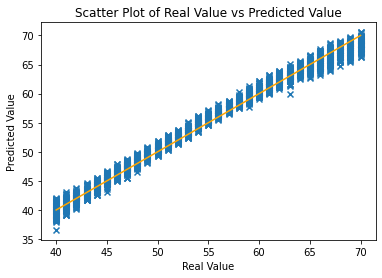

In [18]:
# Create a scatter plot
plt.scatter(predictions_test_df['Real Value'], predictions_test_df['Predicted Value'], marker='x')

# Plot the line y = x
x = np.linspace(predictions_test_df['Real Value'].min(), predictions_test_df['Real Value'].max(), 100)
plt.plot(x, x, color='orange')

# Set plot labels and title
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot of Real Value vs Predicted Value')

# Display the plot
plt.show()

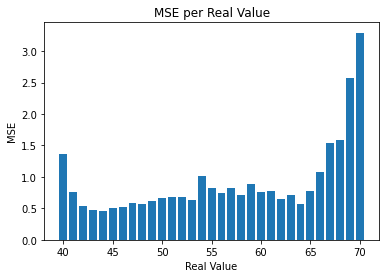

In [19]:
# Calculate the MSE per real value
mse_per_real_value_test = predictions_test_df.groupby('Real Value')['Difference'].apply(lambda x: mean_squared_error(x, np.zeros_like(x)))

# # Print the MSE per real value
# print('MSE per Real Value:')
# print(mse_per_real_value)

# Plot the MSE per real value
plt.bar(mse_per_real_value.index, mse_per_real_value_test)
plt.xlabel('Real Value')
plt.ylabel('MSE')
plt.title('MSE per Real Value')

# Show the plot
plt.show()